In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from setup import *

# SAE MNL

In [74]:
results = pd.read_csv(out_dir+"SAE_A_MNL.csv")
results = results[results['weight_decay'].isin([0.1,1,10,100,1000])]
results = results[results['best_epoch']>50]

In [75]:
results.groupby(['weight','weight_decay']).count()['Train_KL']

weight    weight_decay
0.00      0.1             5
          1.0             5
          10.0            5
          100.0           3
          1000.0          3
0.01      0.1             4
          1.0             5
          10.0            5
          100.0           5
          1000.0          5
0.10      0.1             5
          1.0             5
          10.0            5
          100.0           5
          1000.0          5
1.00      0.1             5
          1.0             5
          10.0            5
          100.0           5
          1000.0          5
10.00     0.1             1
          1.0             5
          10.0            5
          100.0           5
          1000.0          5
100.00    0.1             5
          1.0             5
          10.0            5
          100.0           5
          1000.0          5
1000.00   0.1             4
          1.0             5
          10.0            5
          100.0           5
          1000.0         

In [76]:
resultsww = results.loc[results.groupby(['weight','weight_decay']).idxmin()['Test_KL']][['weight','weight_decay','Train_KL','Test_KL','Train_R2_1','Train_R2_2','Train_R2_3','Train_R2_4','Test_R2_1','Test_R2_2','Test_R2_3','Test_R2_4']]

<ipython-input-43-7f801f6e4924>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(g['weight_decay']), g['Test_KL'], c=cmap(0.2+(np.log10(w)+3)/7*0.8))


Text(0, 0.5, 'Test KL loss')

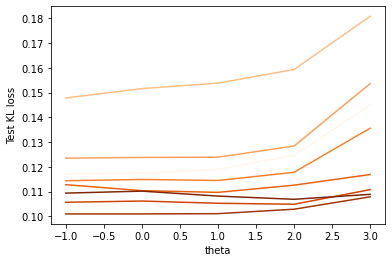

In [43]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Oranges')

for w, g in resultsww.groupby("weight"):
    plt.plot(np.log10(g['weight_decay']), g['Test_KL'], c=cmap(0.2+(np.log10(w)+3)/7*0.8))
plt.xlabel("theta")
plt.ylabel("Test KL loss")

In [40]:
# Best run for each lambda (weight)
resultsw = results.loc[results.groupby(['weight']).idxmin()['Test_KL']]\
[['weight','weight_decay','Train_KL','Test_KL','Train_R2_1','Train_R2_2','Train_R2_3','Train_R2_4','Test_R2_1','Test_R2_2','Test_R2_3','Test_R2_4']]
resultsw


,weight,weight_decay,Train_KL,Test_KL,Train_R2_1,Train_R2_2,Train_R2_3,Train_R2_4,Test_R2_1,Test_R2_2,Test_R2_3,Test_R2_4
237,0.00,0.1,0.1405,0.1172,0.4850,0.5782,0.0247,0.4582,0.4980,0.6340,-0.0775,0.4701
72,0.01,0.1,0.1656,0.1478,0.3382,0.4252,-0.0018,0.3333,0.3290,0.4297,-0.0775,0.3034
136,0.10,0.1,0.1520,0.1235,0.4325,0.5231,0.0023,0.4038,0.4931,0.6057,-0.0441,0.4306
47,1.00,0.1,0.1396,0.1144,0.4725,0.5881,0.0072,0.4938,0.5420,0.6437,-0.0986,0.4602
18,10.00,10.0,0.0975,0.1097,0.6899,0.7600,0.2283,0.7140,0.5288,0.7065,-0.1997,0.4925
121,100.00,100.0,0.1141,0.1049,0.6167,0.6971,0.0921,0.6147,0.5549,0.7291,-0.2111,0.5612
159,1000.00,1.0,0.0859,0.1010,0.7582,0.8075,0.2845,0.7770,0.6112,0.7458,-0.2050,0.5228
205,10000.00,100.0,0.1130,0.1069,0.6231,0.7011,0.0881,0.6241,0.5272,0.7095,-0.1752,0.5102


In [44]:
# All runs for the best lambda
resultsww[resultsww['weight']==1000]

,weight,weight_decay,Train_KL,Test_KL,Train_R2_1,Train_R2_2,Train_R2_3,Train_R2_4,Test_R2_1,Test_R2_2,Test_R2_3,Test_R2_4
167,1000.0,0.1,0.0872,0.1010,0.7600,0.8012,0.2354,0.7843,0.6128,0.7431,-0.2000,0.5240
159,1000.0,1.0,0.0859,0.1010,0.7582,0.8075,0.2845,0.7770,0.6112,0.7458,-0.2050,0.5228
169,1000.0,10.0,0.0892,0.1011,0.7473,0.7970,0.2512,0.7474,0.6074,0.7410,-0.1774,0.5227
158,1000.0,100.0,0.1133,0.1029,0.6269,0.7034,0.0739,0.6195,0.5784,0.7283,-0.1425,0.5428
166,1000.0,1000.0,0.1294,0.1079,0.5355,0.6386,0.0218,0.5255,0.5501,0.6933,-0.1061,0.5252


/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


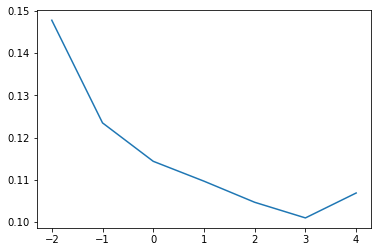

In [7]:
plt.plot(np.log10(resultsw['weight']), resultsw['Test_KL'])

# SAE LR

In [61]:
res_lr = pd.read_csv(out_dir+"SAE_A_LR.csv")
res_lr = res_lr[res_lr['lambda'].isin([1,10,100,1000,10000])]
res_lr = res_lr[res_lr['theta'].isin([2e-4,4e-4,6e-4,8e-4,1e-3])]

In [62]:
# Best model for each lambda and mode
lrw = res_lr.loc[res_lr.groupby(['model','lambda']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]

<ipython-input-62-1aaf5caab36b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lrw = res_lr.loc[res_lr.groupby(['model','lambda']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]


/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


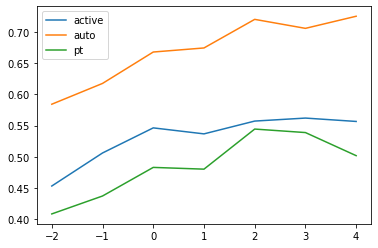

In [12]:
for m,g in lrw.groupby("model"):
    plt.plot(np.log10(g['lambda']), g['test_r2'], label=m)
plt.legend();

In [13]:
# AE
res_lr.loc[res_lr[res_lr['lambda']==0].groupby(['model']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]

<ipython-input-13-8bfb6552668d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_lr.loc[res_lr[res_lr['lambda']==0].groupby(['model']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]


,model,lambda,theta,train_r2,test_r2,nonzero_x
397,active,0.0,0.0002,0.6021,0.4954,248
363,auto,0.0,0.0002,0.7193,0.6318,367
379,pt,0.0,0.0001,0.6250,0.4445,324


In [67]:
# SAE best lambda
res_lr.loc[res_lr.groupby(['model']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]


<ipython-input-67-53222bc581d5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_lr.loc[res_lr.groupby(['model']).idxmax()['test_r2']][['model','lambda','theta','train_r2','test_r2','nonzero_x']]


,model,lambda,theta,train_r2,test_r2,nonzero_x
301,active,1000.0,0.0008,0.5628,0.5619,71
316,auto,10000.0,0.0006,0.7049,0.7223,164
178,pt,100.0,0.0004,0.5791,0.5443,99


In [64]:
res_lr[(res_lr['lambda']==10000)&(res_lr['model']=='auto')&(res_lr['theta'].isin([2e-4,4e-4,6e-4,8e-4,1e-3]))]

,lambda,theta,model,train_r2,test_r2,reg,nonzero_x,dim_x
312,10000.0,0.0002,auto,0.8765,0.6576,lasso,650,18432
314,10000.0,0.0004,auto,0.7610,0.7149,lasso,280,18432
316,10000.0,0.0006,auto,0.7049,0.7223,lasso,164,18432
318,10000.0,0.0008,auto,0.6783,0.7129,lasso,107,18432
319,10000.0,0.0010,auto,0.6606,0.7083,lasso,76,18432


In [65]:
res_lr[(res_lr['lambda']==1000)&(res_lr['model']=='active')&(res_lr['theta'].isin([2e-4,4e-4,6e-4,8e-4,1e-3]))]

,lambda,theta,model,train_r2,test_r2,reg,nonzero_x,dim_x
295,1000.0,0.0002,active,0.7982,0.4938,lasso,471,18432
297,1000.0,0.0004,active,0.6563,0.5396,lasso,193,18432
299,1000.0,0.0006,active,0.5912,0.5536,lasso,117,18432
301,1000.0,0.0008,active,0.5628,0.5619,lasso,71,18432
302,1000.0,0.0010,active,0.5498,0.5602,lasso,60,18432


In [68]:
res_lr[(res_lr['lambda']==100)&(res_lr['model']=='pt')&(res_lr['theta'].isin([2e-4,4e-4,6e-4,8e-4,1e-3]))]

,lambda,theta,model,train_r2,test_r2,reg,nonzero_x,dim_x
176,100.0,0.0002,pt,0.7107,0.5286,lasso,269,18432
178,100.0,0.0004,pt,0.5791,0.5443,lasso,99,18432
180,100.0,0.0006,pt,0.5362,0.5201,lasso,51,18432
182,100.0,0.0008,pt,0.5141,0.4948,lasso,34,18432
183,100.0,0.0010,pt,0.5020,0.4786,lasso,26,18432


# SAE Disaggregate

In [83]:
results_d = pd.read_csv(out_dir+"SAE_D.csv")

In [84]:
# Best model for each lambda
results_d.loc[results_d.groupby(['lambda']).idxmin()['test_loss']][['lambda','wd','lr','train_loss','test_loss','train_acc','test_acc']]


<ipython-input-84-4fb1badc3c7f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_d.loc[results_d.groupby(['lambda']).idxmin()['test_loss']][['lambda','wd','lr','train_loss','test_loss','train_acc','test_acc']]


,lambda,wd,lr,train_loss,test_loss,train_acc,test_acc
143,0.00,0.00001,0.00001,0.6586,0.6500,0.7556,0.7613
75,0.01,0.00100,0.00001,0.4246,0.4230,0.8526,0.8523
59,0.10,0.00001,0.00001,0.4319,0.4300,0.8479,0.8482
33,1.00,0.00100,0.00001,0.4088,0.4094,0.8582,0.8573
2,10.00,0.00100,0.00001,0.4090,0.4208,0.8563,0.8521
101,100.00,0.00001,0.00001,0.3963,0.4095,0.8614,0.8571
118,1000.00,0.01000,0.00001,0.3998,0.4121,0.8594,0.8562
161,10000.00,0.00001,0.00001,0.4031,0.4159,0.8568,0.8533


In [31]:
# All models for the best lambda
results_d.loc[results_d[results_d['lambda']==1000].groupby(['lambda','wd']).idxmin()['test_loss']][['lambda','wd','lr','train_loss','test_loss','train_acc','test_acc']]


<ipython-input-31-a620cfb2c0a5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_d.loc[results_d[results_d['lambda']==1000].groupby(['lambda','wd']).idxmin()['test_loss']][['lambda','wd','lr','train_loss','test_loss','train_acc','test_acc']]


,lambda,wd,lr,train_loss,test_loss,train_acc,test_acc
122,1000.0,0.00001,0.00001,0.4129,0.4234,0.8551,0.8551
123,1000.0,0.00010,0.00001,0.4007,0.4140,0.8579,0.8552
117,1000.0,0.00100,0.00001,0.4099,0.4233,0.8552,0.8511
118,1000.0,0.01000,0.00001,0.3998,0.4121,0.8594,0.8562
119,1000.0,0.10000,0.00001,0.4242,0.4257,0.8528,0.8493
120,1000.0,1.00000,0.00001,0.4406,0.4390,0.8458,0.8458
121,1000.0,10.00000,0.00001,0.4661,0.4597,0.8387,0.8415


# All other models MNL

In [91]:
results = pd.read_csv(out_dir+"AllModels_A_MNL.csv")

In [92]:
resultsw = results.loc[results.groupby(['weight']).idxmin()['Test_KL']]\
[['weight','weight_decay','Train_KL','Test_KL','Train_R2_1','Train_R2_2','Train_R2_3','Train_R2_4','Test_R2_1','Test_R2_2','Test_R2_3','Test_R2_4']]
resultsw

,weight,weight_decay,Train_KL,Test_KL,Train_R2_1,Train_R2_2,Train_R2_3,Train_R2_4,Test_R2_1,Test_R2_2,Test_R2_3,Test_R2_4
53,All,50.00000,0.1031,0.1020,0.6675,0.7396,0.1567,0.6625,0.5810,0.7185,-0.1120,0.5055
46,Demo+AE,10.00000,0.1326,0.1154,0.5082,0.6098,0.0284,0.5208,0.5168,0.6332,-0.1253,0.4561
7,SSD,0.00001,0.1493,0.1262,0.4298,0.5321,0.0015,0.4094,0.4479,0.5751,-0.0846,0.4512


# All other models LR

In [93]:
res_lr = pd.read_csv(out_dir+"AllModels_A_LR.csv")
res_lr.loc[res_lr.groupby(['model_option','model']).idxmax()['test_r2']][['model_option','model','theta','train_r2','test_r2','nonzero_x']]


<ipython-input-93-c4dfa205612a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res_lr.loc[res_lr.groupby(['model_option','model']).idxmax()['test_r2']][['model_option','model','theta','train_r2','test_r2','nonzero_x']]


,model_option,model,theta,train_r2,test_r2,nonzero_x
72,All,active,0.0010,0.5498,0.5600,60
85,All,auto,0.0007,0.6934,0.7060,120
79,All,pt,0.0004,0.5991,0.5385,107
38,Demo+AE,active,0.0002,0.6106,0.5189,233
10,Demo+AE,auto,0.0002,0.7288,0.6491,341
26,Demo+AE,pt,0.0001,0.6508,0.4683,312
2,SSD,active,0.0000,0.4744,0.5156,10
0,SSD,auto,0.0000,0.5889,0.6412,10
1,SSD,pt,0.0000,0.4686,0.5166,10


# All other models Disaggregate

In [81]:
results_d = pd.read_csv(out_dir+"AllModels_D.csv")

In [82]:
results_d.loc[results_d.groupby(['model_option']).idxmin()['test_loss']][['model_option','wd','lr','train_loss','test_loss','train_acc','test_acc']]


<ipython-input-82-a00c28f576d1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results_d.loc[results_d.groupby(['model_option']).idxmin()['test_loss']][['model_option','wd','lr','train_loss','test_loss','train_acc','test_acc']]


,model_option,wd,lr,train_loss,test_loss,train_acc,test_acc
12,2,0.000100,0.00001,0.4220,0.4229,0.8525,0.8529
28,3,0.000001,0.00100,0.4077,0.4066,0.8595,0.8614
33,5,0.000001,0.00010,0.4239,0.4081,0.8513,0.8533
50,6,0.000100,0.00010,0.3788,0.4030,0.8697,0.8636
